<a href="https://colab.research.google.com/github/keyunzhou2/CIND820/blob/main/Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload Data

In [4]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()
data_file="df4.csv"
df1=read_csv(data_file)

In [ ]:
df1.info()

In [66]:
df1['Outcome'].value_counts()

1    179560
0      3485
Name: Outcome, dtype: int64

# All feature

In [10]:
target = df1['Outcome']
feature = df1.drop(['Outcome'], axis=1)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.3, 
                                                    random_state=2)

## SMOTE

In [8]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [17]:
oversampled_x, oversampled_y = sm.fit_resample(x_train, y_train)
oversampled = pd.concat([pd.DataFrame(oversampled_y), pd.DataFrame(oversampled_x)], axis=1)

In [19]:
oversampled['Outcome'].value_counts()

1    125692
0    125692
Name: Outcome, dtype: int64

In [76]:
glm = LogisticRegression()
glm.fit(oversampled_x,oversampled_y)

LogisticRegression()

In [74]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [75]:
import statsmodels.api as sm
model = sm.Logit(oversampled_y, oversampled_x)
model_fit = model.fit()
print(model_fit.summary())

         Current function value: 0.167498
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:               251384
Model:                          Logit   Df Residuals:                   251345
Method:                           MLE   Df Model:                           38
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.7584
Time:                        19:49:17   Log-Likelihood:                -42106.
converged:                      False   LL-Null:                   -1.7425e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Outbreak.Associated                                     

In [34]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [77]:
glm_eval = evaluate_model(glm, x_test, y_test)

# Print result
print('Accuracy:', glm_eval['acc'])
print('Precision:', glm_eval['prec'])
print('Recall:', glm_eval['rec'])
print('F1 Score:', glm_eval['f1'])
print('Cohens Kappa Score:', glm_eval['kappa'])
print('Area Under Curve:', glm_eval['auc'])
print('Confusion Matrix:\n', glm_eval['cm'])

Accuracy: 0.9128637505918346
Precision: 0.9983551629607067
Recall: 0.9126754288260192
F1 Score: 0.9535946000989206
Cohens Kappa Score: 0.263736752207966
Area Under Curve: 0.9665294979257419
Confusion Matrix:
 [[  965    81]
 [ 4704 49164]]


In [43]:
from sklearn import tree
feature_names = list(oversampled_x.columns.values)

Accuracy: 0.8563754233892996
Precision: 0.9991532599491956
Recall: 0.8543105368678993
F1 Score: 0.9210723828394728
Cohens Kappa Score: 0.17531577156760403
Area Under Curve: 0.9416941096435576
Confusion Matrix:
 [[ 1007    39]
 [ 7848 46020]]


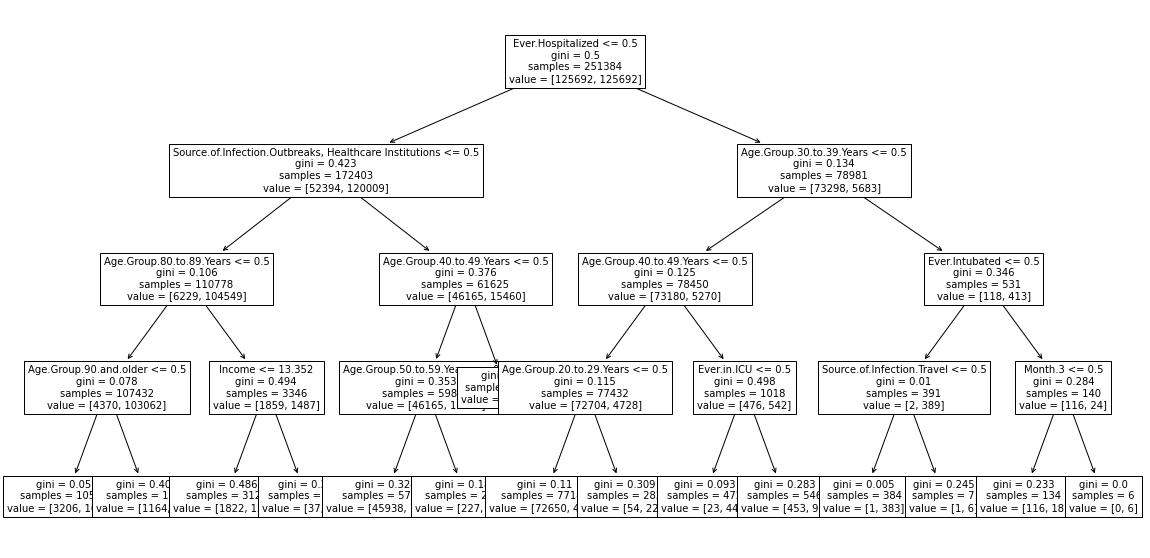

In [59]:
dtc = tree.DecisionTreeClassifier(random_state=0, max_depth=4)
dtc.fit(oversampled_x, oversampled_y)

# Evaluate Model
dtc_eval = evaluate_model(dtc, x_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

plt.figure(figsize=(20,10)) 
tree.plot_tree(dtc, feature_names=feature_names, fontsize=10)
plt.savefig('decision-tree-all-features.pdf')

In [46]:
import xgboost as xgb

In [50]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(oversampled_x,oversampled_y)

XGBClassifier()

In [80]:
# Evaluate Model
xgb_eval = evaluate_model(xgb_classifier, x_test, y_test)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])


plt.savefig('decision-tree-all-features.pdf')

Accuracy: 0.8915030775394253
Precision: 0.9990832951372974
Recall: 0.8902131135367937
F1 Score: 0.9415113973258987
Cohens Kappa Score: 0.22608587179950546
Area Under Curve: 0.9681684451092899
Confusion Matrix:
 [[ 1002    44]
 [ 5914 47954]]


<Figure size 432x288 with 0 Axes>

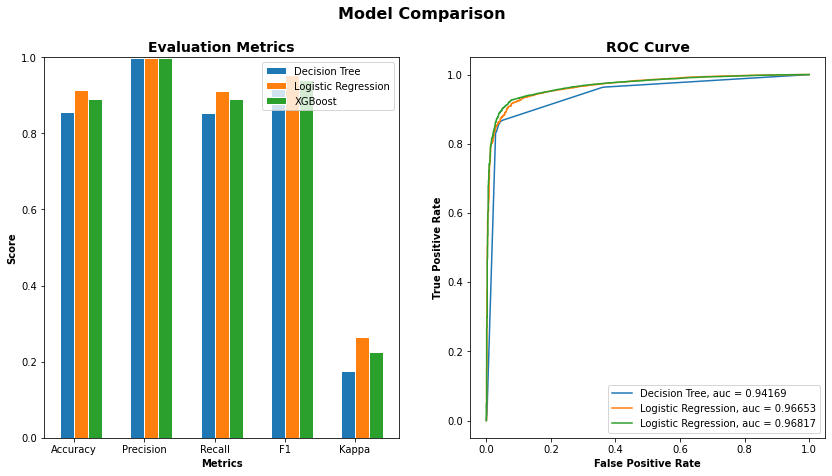

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
glm_score = [glm_eval['acc'], glm_eval['prec'], glm_eval['rec'], glm_eval['f1'], glm_eval['kappa']]
xgb_score = [xgb_eval['acc'], xgb_eval['prec'], xgb_eval['rec'], xgb_eval['f1'], xgb_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r2, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r3, glm_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r4, xgb_score, width=barWidth, edgecolor='white', label='XGBoost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(glm_eval['fpr'], glm_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(glm_eval['auc']))
ax2.plot(xgb_eval['fpr'], xgb_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(xgb_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Feature selection

In [ ]:
X_dummy = df1.drop(['Outcome'], axis=1)
y_dummy = df1["Outcome"]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.feature_selection import chi2,SelectKBest

In [ ]:
ch2c=SelectKBest(score_func=chi2,k=18)
ch2c.fit(X_dummy,y_dummy)
features_score_pvalue=pd.DataFrame({"Score":ch2c.scores_,"P_Value":np.round(ch2c.pvalues_,3)},index=X_dummy.columns)
features_score_pvalue.nlargest(n=20,columns="Score")

,Score,P_Value
Ever.Hospitalized,20186.313857,0.0
Ever.in.ICU,15257.349183,0.0
Ever.Intubated,14556.374412,0.0
Age.Group_90 and older,6262.922701,0.0
Age.Group_80 to 89 Years,5928.262025,0.0
"Source.of.Infection_Outbreaks, Healthcare Institutions",5058.402537,0.0
Age.Group_70 to 79 Years,1486.592608,0.0
Outbreak.Associated,678.279570,0.0
Age.Group_20 to 29 Years,605.679563,0.0
Age.Group_19 and younger,585.076085,0.0


# Selected model